In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# 관련 모듈 부르기 및 시각화를 위한 셋팅
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scikitplot as skplt

from graphviz import Source
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn import datasets, metrics, model_selection, svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score,recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_curve,f1_score, auc
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

from sklearn.experimental import enable_hist_gradient_boosting  # noqa

from sklearn.ensemble import GradientBoostingClassifier
sns.set()
sns.set_style('white')
sns.set_color_codes(palette='dark') 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [2]:
# 데이터 불러오기

data = pd.read_csv('.\p2p_data.csv')

In [3]:
data.head()

,annual_inc,bc_util,chargeoff_within_12_mths,dti,inq_last_6mths,mths_since_last_delinq,num_accts_ever_120_pd,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bc_limit,avg_cur_bal,pct_tl_nvr_dlq,revol_bal,total_acc,int_rate,verification_status,home_ownership,term,TARGET
0,53000.0,88.8,0,25.25,0,11,0,0,0,132074,11200,14564,100.0,13780,17,20.49,Source Verified,OWN,60 months,1
1,60000.0,94.4,0,25.88,0,20,1,0,0,68761,6300,5565,87.5,7378,16,12.29,Not Verified,RENT,36 months,0
2,125000.0,82.5,0,10.93,1,77,0,0,0,229006,15000,14929,100.0,14171,41,7.89,Not Verified,RENT,36 months,0
3,90000.0,77.6,0,22.75,0,79,0,0,0,248018,43900,12054,100.0,34073,41,17.57,Verified,MORTGAGE,60 months,0
4,76863.0,43.3,0,19.53,1,34,2,0,0,40792,2400,3816,77.8,1040,20,9.17,Not Verified,MORTGAGE,36 months,0


In [4]:
data=data.drop(['verification_status','home_ownership','term'],axis=1)

In [5]:
#X변수와 Y변수 분리
#TARGET이 Y고 나머지가 X
y=data['TARGET'].values
X=data.drop('TARGET',axis=1)

In [6]:
#train data와 test data로 분할
X_train, X_test, y_train, y_test=train_test_split(X, y,
                                                 stratify=y,
                                                 test_size=0.2,
                                                 random_state=93456)

In [7]:
clf_gb=GradientBoostingClassifier(random_state=2019, n_estimators=100, learning_rate=0.1)

In [8]:
#validation set 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size=1/9,
                                                      stratify=y_train,
                                                      random_state=93456)
clf_gb.fit(X_train, y_train)
y_train_pred = clf_gb.predict(X_train)
y_test_pred=clf_gb.predict(X_test)
y_valid_pred = clf_gb.predict(X_valid)

## Train, Test, Validation 비교

- Accuracy (Train)      : 0.7764
- Accuracy (Test) : 0.7667
- Accuracy (Validation) : 0.773

- F1 score (Train)      : 0.2322
- F1 score (Test) : 0.1885
- F1 score (Validation) : 0.1986

- precision score (Train)      : 0.6522
- precision score (Test) : 0.5632
- precision score (Validation) : 0.6429

- recall score (Train)      : 0.1413
- recall score (Test) : 0.1132
- recall score (Validation) : 0.1175

- Specificity score (Train)      : 0.6522
- Specificity score (Test) : 0.08856
- Specificity score (Validation) : 0.6429

- Balanced Correction Rate score (Train)      : 0.3035
- Balanced Correction Rate score (Test) : 0.2717
- Balanced Correction Rate score (Validation) : 0.2768

- Type 1 Error score (Train)      : 0.0237
- Type 1 Error score (Test) : 0.02763
- Type 1 Error score (Validation) : 0.02055

- Type 2 Error score (Train)      : 0.8587
- Type 2 Error score  (Test) : 3.053
- Type 2 Error score  (Validation) : 6.863

- AUC       : 0.5428



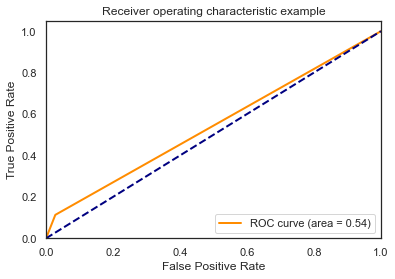

In [9]:
#아래 performance measure에 대해서 잘 알아야한다
#PDF 강의자료 참고하기!

# Show train & validation accuracies
#y_train:실제값이랑 y_train_pred: 예측값에 대한 것
print('- Accuracy (Train)      : {:.4}'.format(accuracy_score(y_train, y_train_pred)))
#validation에 대한것
print('- Accuracy (Test) : {:.4}'.format(accuracy_score(y_test, y_test_pred)))
print('- Accuracy (Validation) : {:.4}'.format(accuracy_score(y_valid, y_valid_pred)))
print(end="\n")
# Show train & validation f1 scores
#f1 score 계산할 때 우리가 recall 값을 계산해 줘야한다(민감도) 그리고 precision를 계산해
#줘야 하는데 positive 클래스가 어떤 것이냐에 따라 다르니까 옵션에 pos_label 즉
#positive 레이블을 뭘로 할꺼냐? 나는 관심있는 M 악성 종양을 positive class로 할것이라는 것이다
print('- F1 score (Train)      : {:.4}'.format(f1_score(y_train, y_train_pred, pos_label=1)))
print('- F1 score (Test) : {:.4}'.format(f1_score(y_test, y_test_pred, pos_label=1)))
print('- F1 score (Validation) : {:.4}'.format(f1_score(y_valid, y_valid_pred, pos_label=1)))

print(end="\n")
# Show train & validation Precision scores
#마찬가지로 precision_score도 positive class를 옵션으로 선언해준다.
print('- precision score (Train)      : {:.4}'.format(precision_score(y_train, y_train_pred, pos_label=1)))
print('- precision score (Test) : {:.4}'.format(precision_score(y_test, y_test_pred, pos_label=1)))
print('- precision score (Validation) : {:.4}'.format(precision_score(y_valid, y_valid_pred, pos_label=1)))

print(end="\n")
# Show train & validation recall scores
#리콜도 마찬가지로 precision_score도 positive class를 옵션으로 선언해준다.
print('- recall score (Train)      : {:.4}'.format(recall_score(y_train, y_train_pred, pos_label=1)))
print('- recall score (Test) : {:.4}'.format(recall_score(y_test, y_test_pred, pos_label=1)))
print('- recall score (Validation) : {:.4}'.format(recall_score(y_valid, y_valid_pred, pos_label=1)))

print(end="\n")
#하지만 accuracy는 해줄 필요없다 왜냐면 그냥 대각선의 합이니까
tn, fp, fn, tp=confusion_matrix(y_train, y_train_pred).ravel()
tnt, fpt, fnt, tpt=confusion_matrix(y_test, y_test_pred).ravel()
tnv, fpv, fnv, tpv=confusion_matrix(y_valid, y_valid_pred).ravel()


spec_score=tp/(tp+fp)
spec_score_t=tpv/(tp+fpt)
spec_score_v=tpv/(tpv+fpv)


bcr=(spec_score*recall_score(y_train, y_train_pred, pos_label=1))**0.5
bcr_t=(spec_score*recall_score(y_test, y_test_pred, pos_label=1))**0.5
bcr_v=(spec_score*recall_score(y_valid, y_valid_pred, pos_label=1))**0.5


print('- Specificity score (Train)      : {:.4}'.format(spec_score))
print('- Specificity score (Test) : {:.4}'.format(spec_score_t))
print('- Specificity score (Validation) : {:.4}'.format(spec_score_v))

print(end="\n")

print('- Balanced Correction Rate score (Train)      : {:.4}'.format(bcr))
print('- Balanced Correction Rate score (Test) : {:.4}'.format(bcr_t))
print('- Balanced Correction Rate score (Validation) : {:.4}'.format(bcr_v))

print(end="\n")

t1=fp/(fp+tn)
t1_t=fpt/(fpt+tnt)
t1_v=fpv/(fpv+tnv)


t2=fn/(fn+tp)
t2_t=fn/(fnt+tpt)
t2_v=fn/(fnv+tpv)


print('- Type 1 Error score (Train)      : {:.4}'.format(t1))
print('- Type 1 Error score (Test) : {:.4}'.format(t1_t))
print('- Type 1 Error score (Validation) : {:.4}'.format(t1_v))

print(end="\n")

print('- Type 2 Error score (Train)      : {:.4}'.format(t2))
print('- Type 2 Error score  (Test) : {:.4}'.format(t2_t))
print('- Type 2 Error score  (Validation) : {:.4}'.format(t2_v))

y_pred = clf_gb.predict(X_test)
print(end="\n")

fpr, tpr, thresholds =  roc_curve(y_test, y_pred, pos_label=1)
print('- AUC       : {:.4}'.format(auc(fpr, tpr)))
print(end="\n")
      
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## 최적의 learning_rate와 n_esti 찾기

### 5-CV Grid Search

In [11]:
base=GradientBoostingClassifier()

opt={'n_estimators':[20,40,60,80,100],'learning_rate':[0.2,0.4,0.6,0.8,1]}
cv=GridSearchCV(estimator=base, param_grid=opt,cv=5, scoring='accuracy')

#### Fitting 시키기

In [ ]:
cv_fitted=cv.fit(X_train, y_train)

#### 최적의 파라미터 찾기

In [52]:
cv_fitted.best_params_

{'learning_rate': 0.2, 'max_iter': 20}

In [ ]:
clf_gb=GradientBoostingClassifier(max_iter=60,learning_rate=0.2, random_state=2019)
clf_gb.fit(X_train, y_train)

In [ ]:
y_train_pred = clf_gb.predict(X_train)
y_test_pred=clf_gb.predict(X_test)
y_valid_pred = clf_gb.predict(X_valid)

In [ ]:
#아래 performance measure에 대해서 잘 알아야한다
#PDF 강의자료 참고하기!

# Show train & validation accuracies
#y_train:실제값이랑 y_train_pred: 예측값에 대한 것
print('- Accuracy (Train)      : {:.4}'.format(accuracy_score(y_train, y_train_pred)))
#validation에 대한것
print('- Accuracy (Test) : {:.4}'.format(accuracy_score(y_test, y_test_pred)))
print('- Accuracy (Validation) : {:.4}'.format(accuracy_score(y_valid, y_valid_pred)))
print(end="\n")
# Show train & validation f1 scores
#f1 score 계산할 때 우리가 recall 값을 계산해 줘야한다(민감도) 그리고 precision를 계산해
#줘야 하는데 positive 클래스가 어떤 것이냐에 따라 다르니까 옵션에 pos_label 즉
#positive 레이블을 뭘로 할꺼냐? 나는 관심있는 M 악성 종양을 positive class로 할것이라는 것이다
print('- F1 score (Train)      : {:.4}'.format(f1_score(y_train, y_train_pred, pos_label=1)))
print('- F1 score (Test) : {:.4}'.format(f1_score(y_test, y_test_pred, pos_label=1)))
print('- F1 score (Validation) : {:.4}'.format(f1_score(y_valid, y_valid_pred, pos_label=1)))

print(end="\n")
# Show train & validation Precision scores
#마찬가지로 precision_score도 positive class를 옵션으로 선언해준다.
print('- precision score (Train)      : {:.4}'.format(precision_score(y_train, y_train_pred, pos_label=1)))
print('- precision score (Test) : {:.4}'.format(precision_score(y_test, y_test_pred, pos_label=1)))
print('- precision score (Validation) : {:.4}'.format(precision_score(y_valid, y_valid_pred, pos_label=1)))

print(end="\n")
# Show train & validation recall scores
#리콜도 마찬가지로 precision_score도 positive class를 옵션으로 선언해준다.
print('- recall score (Train)      : {:.4}'.format(recall_score(y_train, y_train_pred, pos_label=1)))
print('- recall score (Test) : {:.4}'.format(recall_score(y_test, y_test_pred, pos_label=1)))
print('- recall score (Validation) : {:.4}'.format(recall_score(y_valid, y_valid_pred, pos_label=1)))

print(end="\n")
#하지만 accuracy는 해줄 필요없다 왜냐면 그냥 대각선의 합이니까
tn, fp, fn, tp=confusion_matrix(y_train, y_train_pred).ravel()
tnt, fpt, fnt, tpt=confusion_matrix(y_test, y_test_pred).ravel()
tnv, fpv, fnv, tpv=confusion_matrix(y_valid, y_valid_pred).ravel()


spec_score=tp/(tp+fp)
spec_score_t=tpv/(tp+fpt)
spec_score_v=tpv/(tpv+fpv)


bcr=(spec_score*recall_score(y_train, y_train_pred, pos_label=1))**0.5
bcr_t=(spec_score*recall_score(y_test, y_test_pred, pos_label=1))**0.5
bcr_v=(spec_score*recall_score(y_valid, y_valid_pred, pos_label=1))**0.5


print('- Specificity score (Train)      : {:.4}'.format(spec_score))
print('- Specificity score (Test) : {:.4}'.format(spec_score_t))
print('- Specificity score (Validation) : {:.4}'.format(spec_score_v))

print(end="\n")

print('- Balanced Correction Rate score (Train)      : {:.4}'.format(bcr))
print('- Balanced Correction Rate score (Test) : {:.4}'.format(bcr_t))
print('- Balanced Correction Rate score (Validation) : {:.4}'.format(bcr_v))

print(end="\n")

t1=fp/(fp+tn)
t1_t=fpt/(fpt+tnt)
t1_v=fpv/(fpv+tnv)


t2=fn/(fn+tp)
t2_t=fn/(fnt+tpt)
t2_v=fn/(fnv+tpv)


print('- Type 1 Error score (Train)      : {:.4}'.format(t1))
print('- Type 1 Error score (Test) : {:.4}'.format(t1_t))
print('- Type 1 Error score (Validation) : {:.4}'.format(t1_v))

print(end="\n")

print('- Type 2 Error score (Train)      : {:.4}'.format(t2))
print('- Type 2 Error score  (Test) : {:.4}'.format(t2_t))
print('- Type 2 Error score  (Validation) : {:.4}'.format(t2_v))

y_pred = clf_gb.predict(X_test)
print(end="\n")

fpr, tpr, thresholds =  roc_curve(y_test, y_pred, pos_label=1)
print('- AUC       : {:.4}'.format(auc(fpr, tpr)))
print(end="\n")
      
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()